# META : Rotten Tomatoes Movies Rating Prediction Model

### I have built a high-performing classification algorithm to predict whether a particular movie on Rotten Tomatoes is labeled as 'Rotten', 'Fresh', or 'Certified-Fresh', using two approaches :

#### First : By using numerical and categorical features powered Classification Models
#### Second : By using Text Data and Sentiment Analysis powered Classification Models (based on review data from critics)


## 🧭 Table of Contents

- [FIRST APPROACH : PREDICTING MOVIE STATUS BASED ON NUMERICAL AND CATEGORICAL FEATURES](#first-approach--predicting-movie-status-based-on-numerical-and-categorical-features)
  - [Data Preprocessing](#data-preprocessing)
  - [Model One : Decision Tree Classifier Constrained to Three Leaf Nodes](#model-one--decision-tree-classifier-constrained-to-three-leaf-nodes)
  - [Model Two : Decision Tree Classifier Unconstrained](#model-two--decision-tree-classifier-unconstrained)
  - [Model Three : Random Forest Classifier](#model-three--random-forest-classifier)
  - [Model Four : Random Forest Classifier with Feature Selection](#model-four--random-forest-classifier-with-feature-selection)
  - [Model Five : Weighted Random Forest Classifier with Feature Selection](#model-five--weighted-random-forest-classifier-with-feature-selection)

- [SECOND APPROACH : PREDICTING MOVIE STATUS BASED ON REVIEW TEXT SENTIMENT](#second-approach--predicting-movie-status-based-on-review-text-sentiment)
  - [Model Six : Default Random Forest](#model-six--default-random-forest)
  - [Model Seven : Weighted Random Forest](#model-seven--weighted-random-forest)

- [PREDICTION MODEL IS READY ! (MOVIE STATUS PREDICTION)](#prediction-model-is-ready--movie-status-prediction)



In [144]:
#importing libraries for decision tree & even better - Random Forest Classifier!

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


### FIRST APPROACH : PREDICTING MOVIE STATUS BASED ON NUMERICAL AND CATEGORICAL FEATURES

In [9]:
#Reading the Movie data from Rotten Tomatoes database
df_movie = pd.read_csv('/Users/adyashamohapatra/Desktop/Data Science Projects/META_Rating Prediction_rotten_tomatoes_movies.csv')
df_movie.head()


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [11]:
#checking data distribution aka Summary Statistics

df_movie.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


#### Data Preprocessing

Content Rating Category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

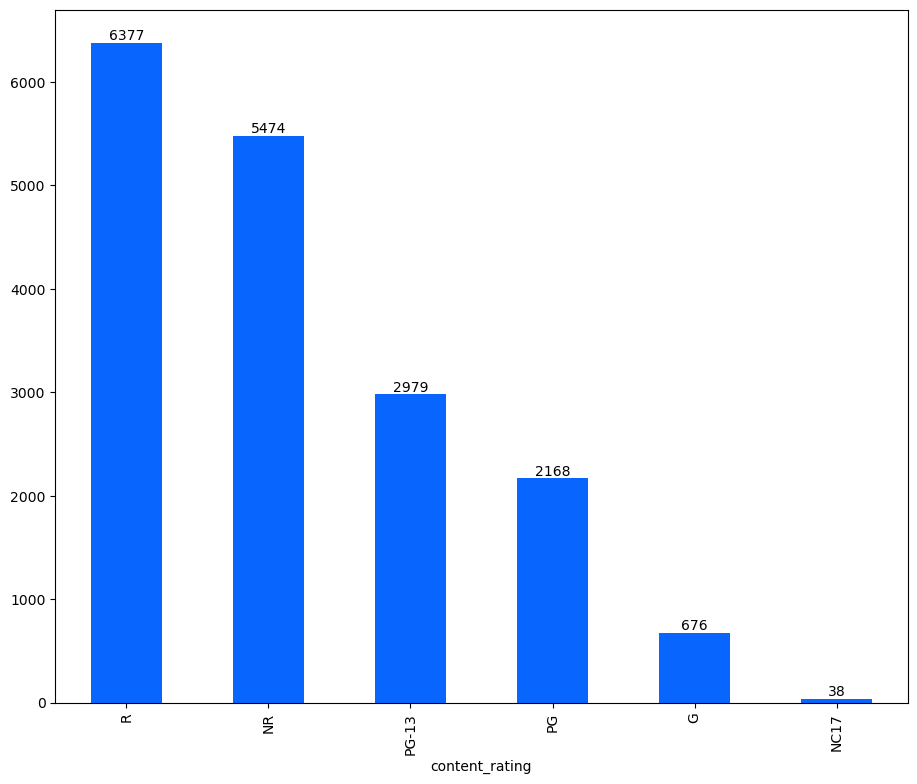

In [14]:
# Data Preprocessing I : content_rating feature
print(f'Content Rating Category: {df_movie.content_rating.unique()}')

#Visualize the distribution for intuitive analysis
ax = df_movie.content_rating.value_counts().plot(kind='bar',figsize=(11,9), color = '#0866FF')
ax.bar_label(ax.containers[0])

In [16]:
#One Hot Encoding for the content_rating feature to be able to use as an output variable for classification

content_rating = pd.get_dummies(df_movie.content_rating, dtype=int)
content_rating.head()

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0


Audience status category: ['Spilled' 'Upright' nan]


[Text(0, 0, '9390'), Text(0, 0, '7874')]

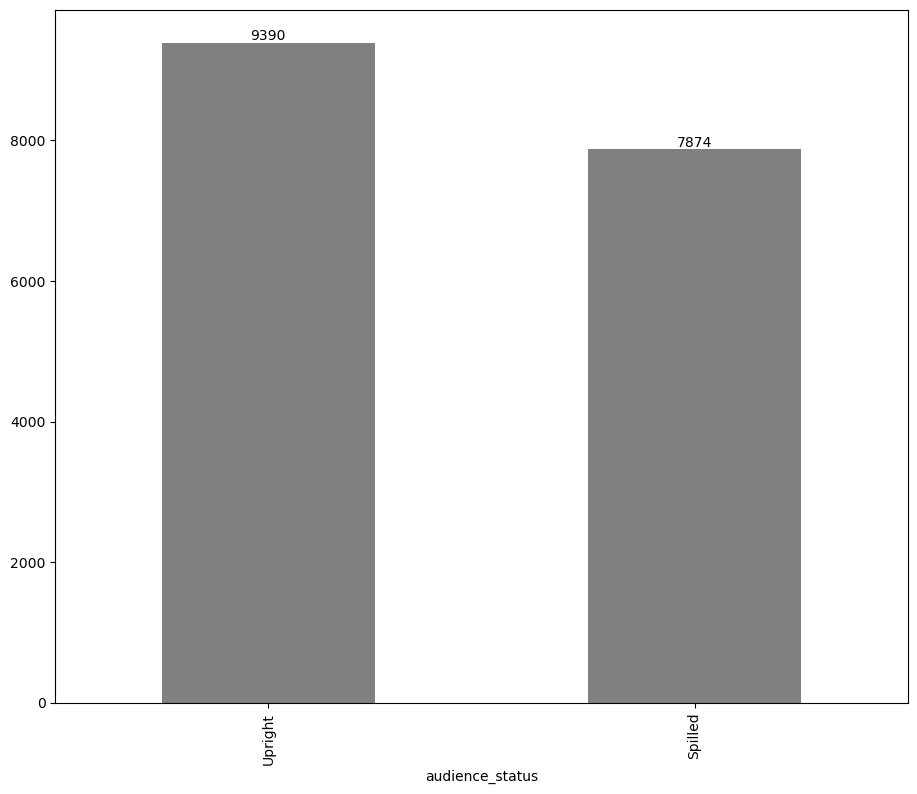

In [18]:
# Data preprocessing II: audience_status feature
print(f'Audience status category: {df_movie.audience_status.unique()}')

#Visualize the distribution intuitively
ax = df_movie.audience_status.value_counts().plot(kind='bar', figsize=(11,9), color ='grey')
ax.bar_label(ax.containers[0])

In [20]:
#Ordinal Encoding for audience status feature

audience_status = pd.DataFrame(df_movie.audience_status.replace(['Spilled','Upright'],[0,1]))

audience_status.head()

/var/folders/vt/txkkqyqd0sd4mndt_bc961yw0000gn/T/ipykernel_38020/2172193397.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  audience_status = pd.DataFrame(df_movie.audience_status.replace(['Spilled','Upright'],[0,1]))


,audience_status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [22]:
#Data Preprocessing III : tomatometer_status feature - Ordinal Encoding
tomatometer_status = pd.DataFrame(df_movie.tomatometer_status.replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))
tomatometer_status

/var/folders/vt/txkkqyqd0sd4mndt_bc961yw0000gn/T/ipykernel_38020/306018642.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tomatometer_status = pd.DataFrame(df_movie.tomatometer_status.replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))


,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0
...,...
17707,0.0
17708,2.0
17709,1.0
17710,1.0


In [24]:
#Combining All The Features into a single dataframe

df_feature = pd.concat([df_movie[['runtime','tomatometer_rating','tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']],content_rating, audience_status, tomatometer_status], axis=1).dropna()

df_feature.head()
                        

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,0,0,0,1,0,0,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,0,0,0,0,0,1,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,0,0,0,0,0,1,0.0,1.0
3,95.0,100.0,54.0,97.0,105386.0,6,54,0,0,0,1,0,0,0,1.0,2.0
4,127.0,89.0,27.0,74.0,68918.0,5,24,3,1,0,0,0,0,0,1.0,1.0


In [26]:
#One Last Check for the distribution of the above dataframe aka Summary Statistics

df_feature.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
count,17017.000000,17017.000000,17017.000000,17017.000000,1.701700e+04,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000
mean,102.296233,60.519539,57.097197,60.324499,1.471183e+05,14.765999,36.237292,20.871188,0.039314,0.002174,0.294940,0.124993,0.171593,0.366986,0.542928,0.752718
std,18.653649,28.436397,66.814580,20.480600,1.783955e+06,15.172256,51.362454,29.978900,0.194346,0.046580,0.456029,0.330720,0.377037,0.481997,0.498168,0.747250
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,44.000000,7.410000e+02,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,66.000000,29.000000,62.000000,4.423000e+03,8.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,111.000000,86.000000,76.000000,77.000000,2.606700e+04,23.000000,44.000000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,266.000000,100.000000,535.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

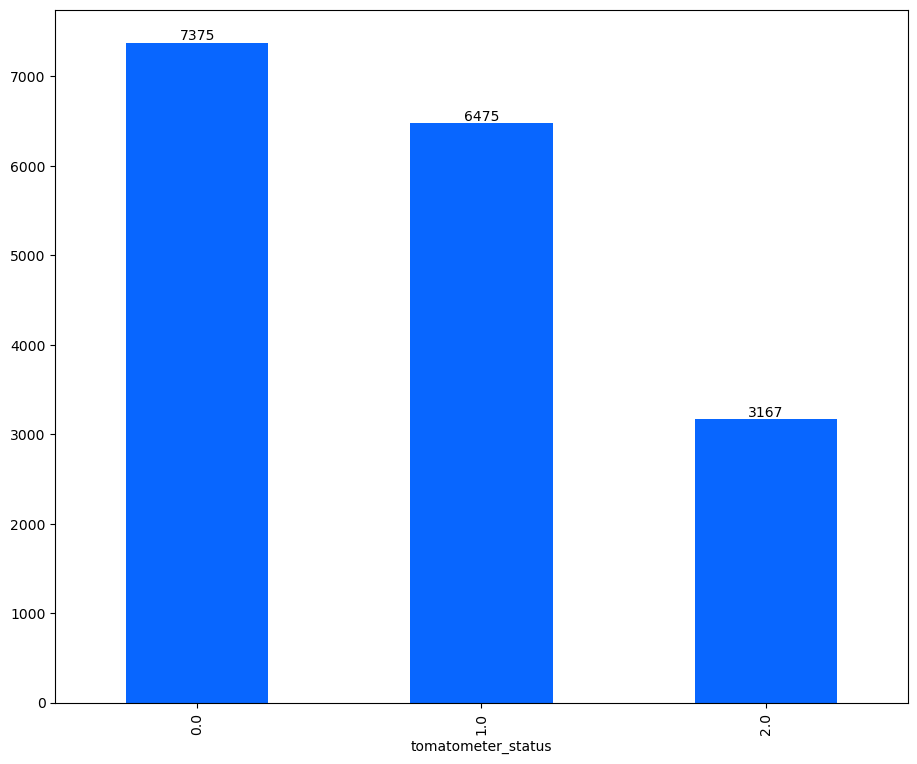

In [28]:
#Checking the Class Distribution for the Target Variable : tomatometer_status
ax = df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize=(11,9), color = '#0866FF')
ax.bar_label(ax.containers[0])

In [30]:
#For Classification Model : Splitting the data into training and test data

X_train, X_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status'], axis=1), df_feature.tomatometer_status, test_size = 0.2, random_state = 32)

print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13613 and the size of test data is 3404


### Model One :  Decision Tree Classifier: Constrained to Three Leaf Nodes

In [174]:
# Instantiate Decision Tree Classifier with max leaf nodes = 3
tree_3_leaf = DecisionTreeClassifier(max_leaf_nodes= 3, random_state=2)


In [35]:
# Train the classifier on the training data
tree_3_leaf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

In [37]:
#Predict the test data with trained tree classifier 
y_predict = tree_3_leaf.predict(X_test)


In [39]:
#Print Accuracy and Classification report on test data
print ( accuracy_score(y_test,y_predict))
print(classification_report(y_test, y_predict))


0.9465334900117509
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1475
         1.0       1.00      0.86      0.93      1310
         2.0       0.77      1.00      0.87       619

    accuracy                           0.95      3404
   macro avg       0.92      0.95      0.93      3404
weighted avg       0.96      0.95      0.95      3404



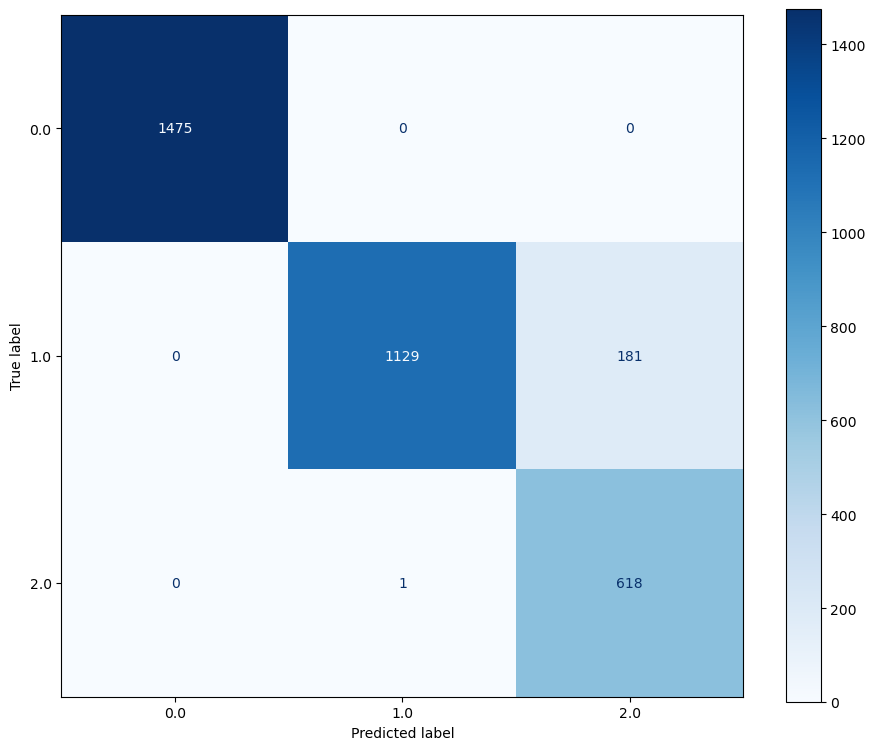

In [41]:
#Plot the confusion matrix on the test data
fig, ax=plt.subplots(figsize=(11,9))
ConfusionMatrixDisplay.from_estimator(estimator=tree_3_leaf, X=X_test, y=y_test, cmap = 'Blues', ax=ax)

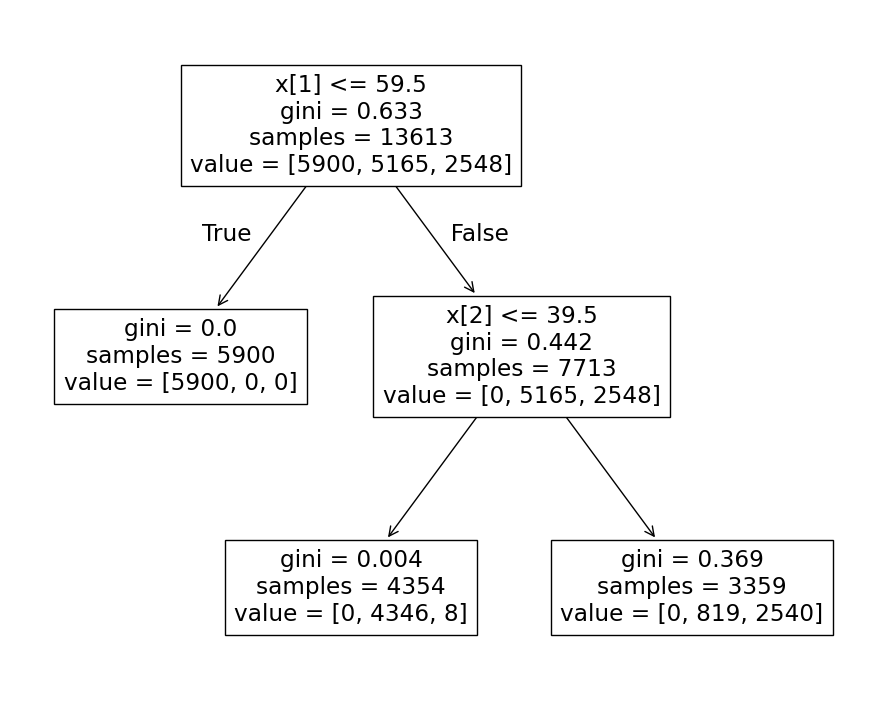

In [85]:
#Visualize decision logic of decision tree model
fig, ax= plt.subplots(figsize=(11,9))
plot_tree(tree_3_leaf, ax=ax)
plt.show()

### Model Two : Decision Tree Classifier: Unconstrained

0.9894242068155111
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1475
         1.0       0.99      0.99      0.99      1310
         2.0       0.97      0.97      0.97       619

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



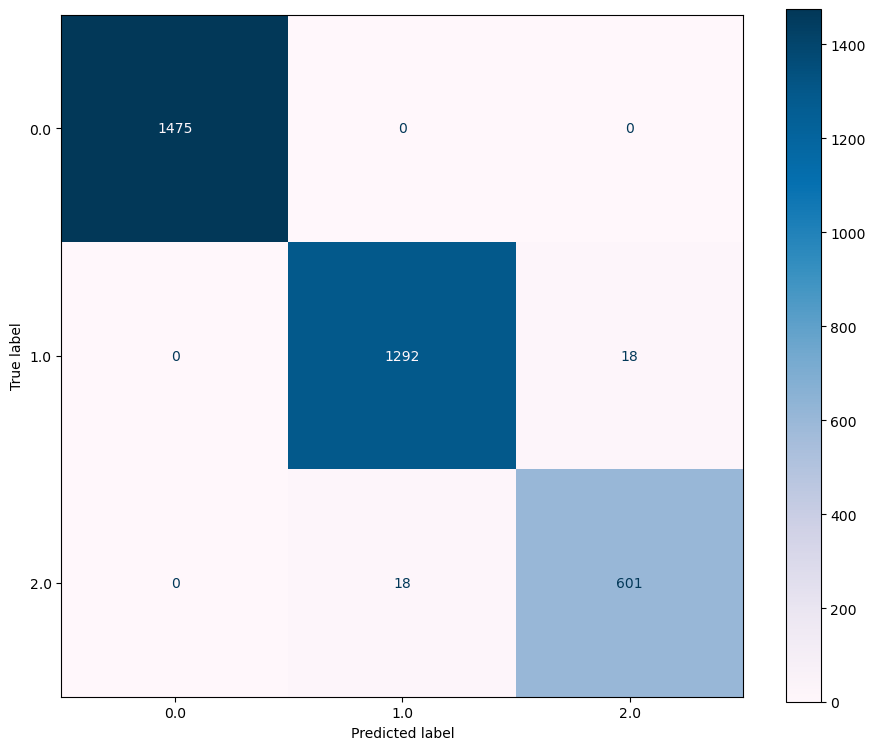

In [46]:
#Decision Tree Classifier with default hyperparameter settings
tree = DecisionTreeClassifier(random_state=2)

#Train the classifier on the training data
tree.fit(X_train, y_train)

#Predict the classifier on the test data
y_predict = tree.predict(X_test)

#print Accuracy Score and Classification Report on the test data

print(accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))

#Plot confusion matrix on test data
fig, ax = plt.subplots(figsize = (11,9))
ConfusionMatrixDisplay.from_estimator(estimator=tree, X=X_test, y=y_test, cmap = 'PuBu', ax=ax)


### Model Three : Random Forest Classifier

0.9911868390129259
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1475
         1.0       0.98      0.99      0.99      1310
         2.0       0.98      0.97      0.98       619

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



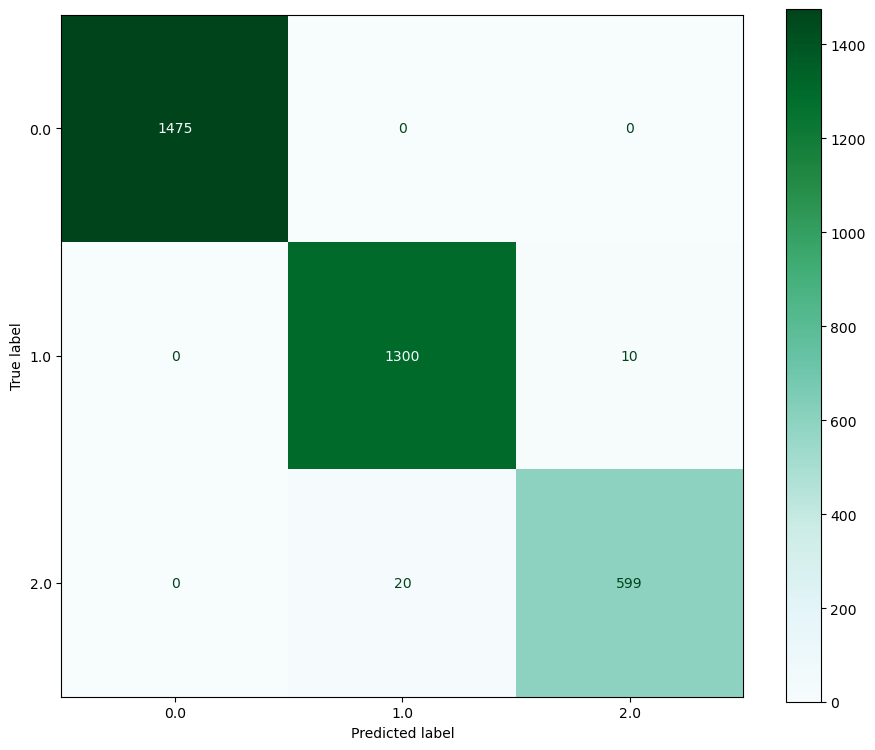

In [49]:
#RandomForestClassifier
rf = RandomForestClassifier(random_state=2)

#Train the model on training data
rf.fit(X_train, y_train)

#Predict with test data
y_predict = rf.predict(X_test)

#Print Accuracy and Classification report
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

#Plot Confusion Matrix
fig, ax= plt.subplots(figsize = (11,9))
ConfusionMatrixDisplay.from_estimator(estimator=rf, X=X_test, y=y_test, cmap = 'BuGn', ax=ax)


### Model Four : Random Forest Classifier with Feature Selection

runtime=0.006068795410812817
tomatometer_rating=0.47281185365787154
tomatometer_count=0.09022886317939507
audience_rating=0.05420677626243354
audience_count=0.01759123544706025
tomatometer_top_critics_count=0.044302146152255216
tomatometer_fresh_critics_count=0.14332891317455865
tomatometer_rotten_critics_count=0.12959752296902516
G=0.00030403384960557436
NC17=1.542092593976658e-05
NR=0.008728766198348326
PG=0.0005237048352754296
PG-13=0.0024985791694746243
R=0.0019506098452279396
audience_status=0.027842778922716135


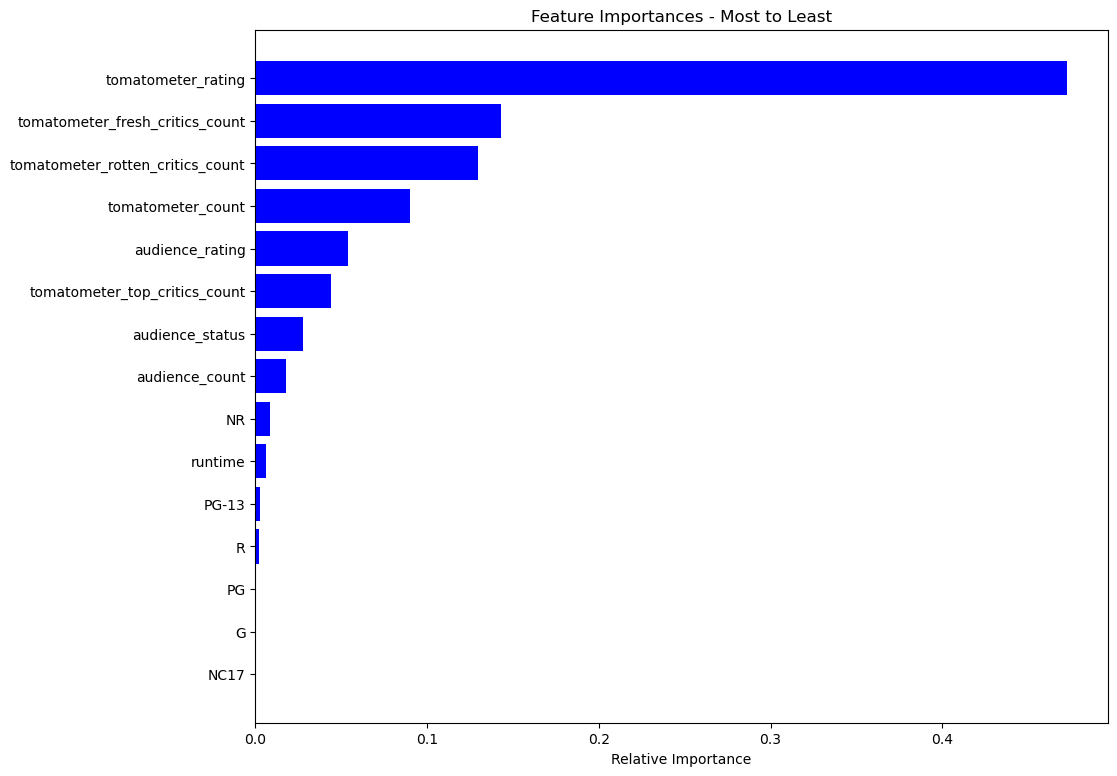

In [52]:
#First, get the feature importance !
feature_importance = rf.feature_importances_

#Print feature importance
for i, feature in enumerate (X_train.columns):
    print(f'{feature}={feature_importance[i]}')

#Visualize feature from the most important to least important 
indices = np.argsort(feature_importance)

plt.figure(figsize=(11,9))
plt.title('Feature Importances - Most to Least')
plt.barh(range(len(indices)), feature_importance[indices],color = 'b', align = 'center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



In [54]:
#Random Forest Classifier with Feature Selection

In [56]:
#Splitting the data into train and test after feature selection
X_train, X_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status', 'NR', 'runtime', 'PG-13', 'R', 'PG','G', 'NC17'], axis=1), df_feature.tomatometer_status, test_size = 0.2, random_state=32)
print(f'Size of training data is {len(X_train)} and size of the test data is {len(X_test)}')


Size of training data is 13613 and size of the test data is 3404


0.9908930669800236
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1475
         1.0       0.98      0.99      0.99      1310
         2.0       0.98      0.97      0.97       619

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



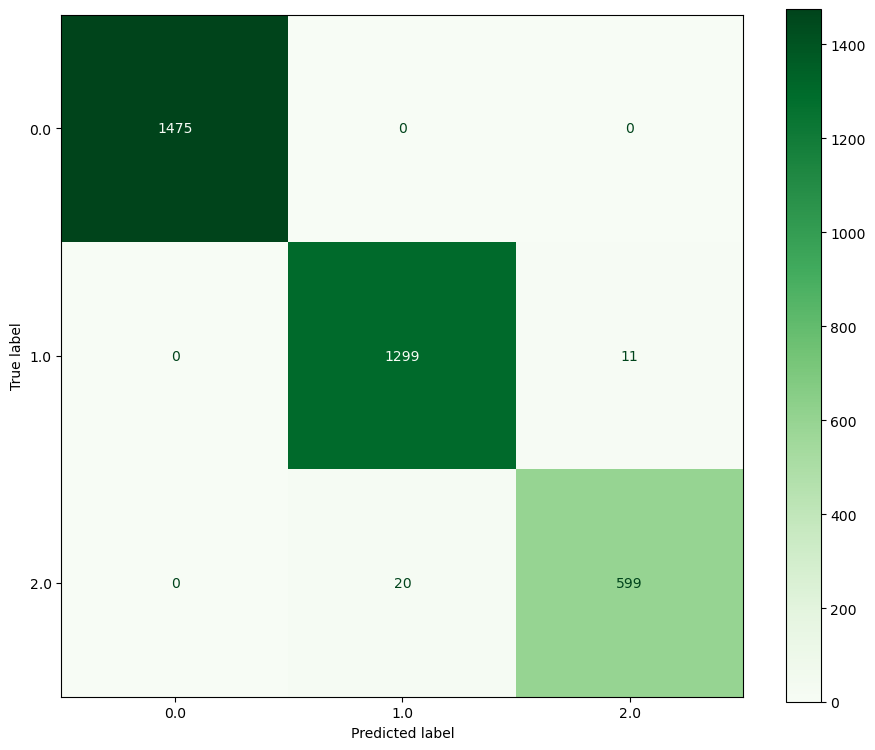

In [58]:
#Now doing the random forest classifier in default unconstrained mode
rf_fs = RandomForestClassifier(random_state=2)

#train
rf_fs.fit(X_train, y_train)

#test
y_predict = rf_fs.predict(X_test)

#Accuracy Score and Classification Report
print (accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

#Plot the confusion matrix
fig, ax = plt.subplots(figsize = (11,9))
ConfusionMatrixDisplay.from_estimator(estimator=rf_fs, X=X_test, y=y_test, cmap ='Greens', ax=ax)



Weighted Random Forest Classifier with Feature Selection

### Model Five : Weighted Random Forest Classifier with Feature Selection

[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

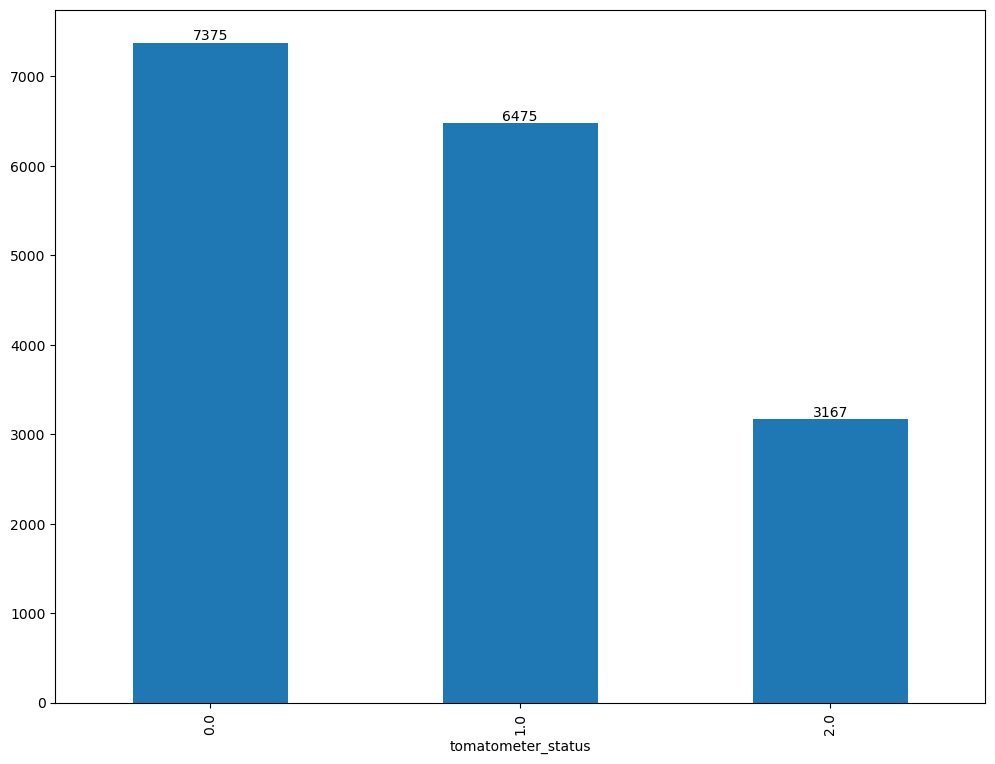

In [62]:
# Check class distribution of target variable once more
ax = df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [64]:
# Compute class weight
class_weight = compute_class_weight(class_weight= 'balanced', classes= np.unique(df_feature.tomatometer_status), 
                      y = df_feature.tomatometer_status.values)

class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 0.7691299435028248, 1: 0.8760360360360361, 2: 1.7910746237238186}

1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1475
         1.0       1.00      1.00      1.00      1310
         2.0       1.00      1.00      1.00       619

    accuracy                           1.00      3404
   macro avg       1.00      1.00      1.00      3404
weighted avg       1.00      1.00      1.00      3404



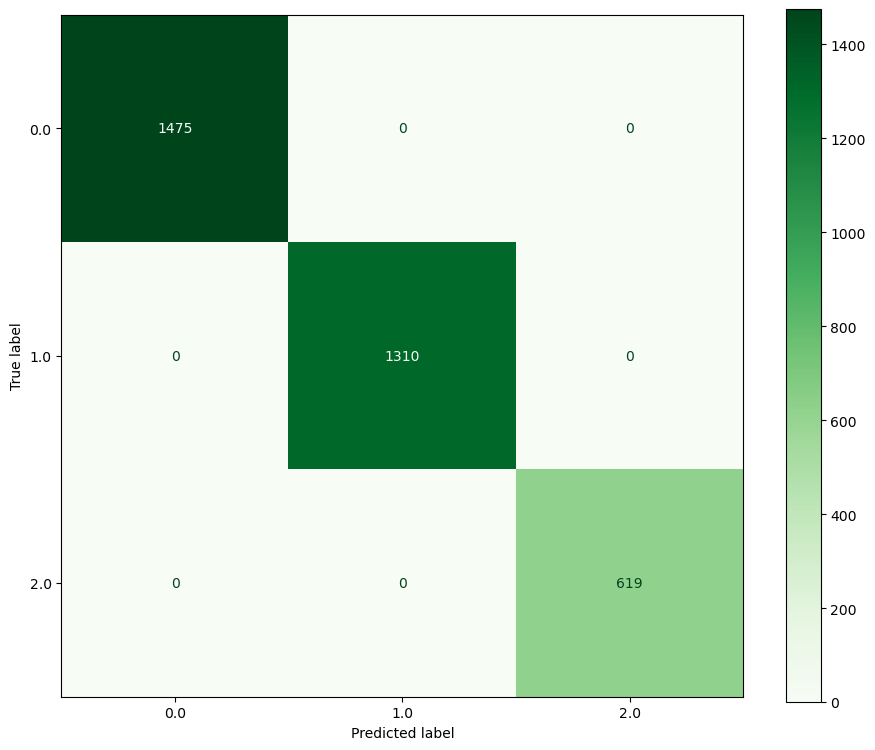

In [66]:
# Initialize Random Forest model with weight information
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)

#train
rf_weighted.fit(X_test, y_test)

#test
y_predict = rf_weighted.predict(X_test)

#Accuracy Score & Classification report 
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

#Confusion Matrix
fig, ax=plt.subplots(figsize=(11,9))
ConfusionMatrixDisplay.from_estimator(estimator=rf_weighted, X = X_test, y=y_test, cmap = 'Greens', ax=ax)


## SECOND APPROACH : PREDICTING MOVIE STATUS BASED ON REVIEW TEXT SENTIMENT

In [69]:
#Reading the Critics database

df_critics = pd.read_csv('/Users/adyashamohapatra/Desktop/Data Science Projects/META_Rating Prediction_rotten_tomatoes_critic_reviews_50k.csv')
df_critics.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [71]:
#Summary Stats
df_critics.describe()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
count,50000,48068,50000,50000,50000,36409,50000,41195
unique,1366,3018,2,1160,2,189,5871,41111
top,m/10_cloverfield_lane,Emanuel Levy,False,EmanuelLevy.Com,Fresh,3/5,2000-01-01,Parental Content Review
freq,309,1070,37512,1033,30796,4529,7580,25


In [73]:
#Merge Critics Dataframe with Movies Dataframe
df_merged = df_critics.merge(df_movie, how='inner', on=['rotten_tomatoes_link'])
df_merged = df_merged[['rotten_tomatoes_link','movie_title','review_content', 'review_type', 'tomatometer_status']]

In [75]:
df_merged.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,A fantasy adventure that fuses Greek mythology...,Fresh,Rotten
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,Rotten
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,With a top-notch cast and dazzling special eff...,Fresh,Rotten
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Whether audiences will get behind The Lightnin...,Fresh,Rotten
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,What's really lacking in The Lightning Thief i...,Rotten,Rotten


In [77]:
# Drop entries with missing reviews
df_merged = df_merged.dropna(subset=['review_content'])

[Text(0, 0, '25276'), Text(0, 0, '15919')]

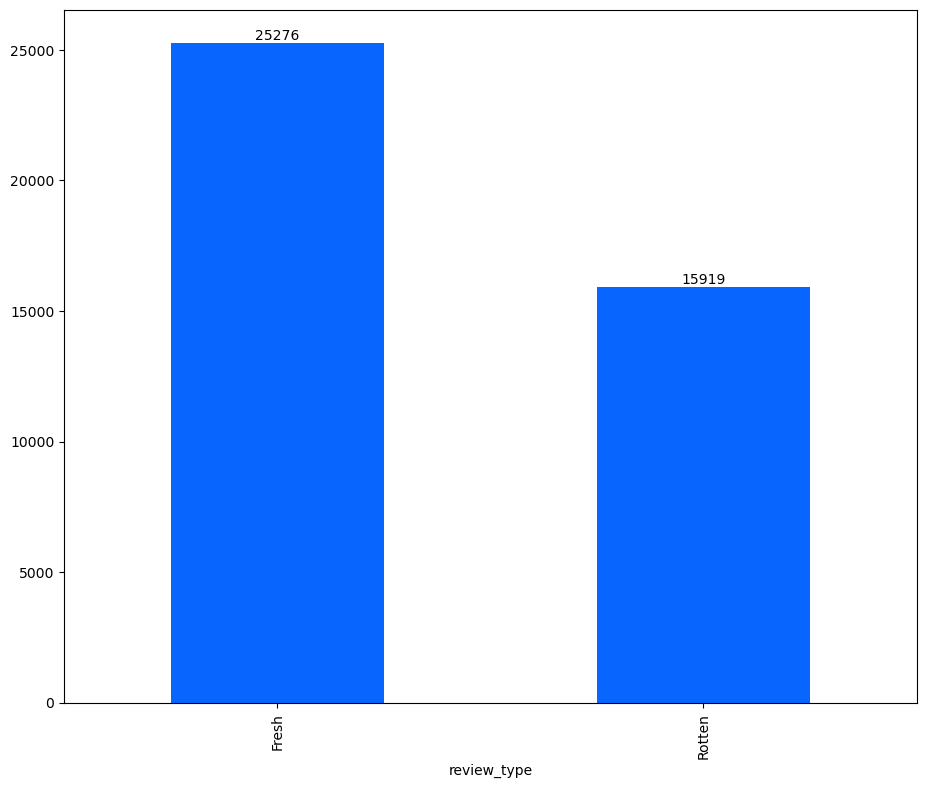

In [81]:
ax = df_merged.review_type.value_counts().plot(kind='bar', figsize=(11,9),color = '#0866FF')
ax.bar_label(ax.containers[0])


In [83]:
# Picking a subset of 5000 entries from the original dataset
df_sub = df_merged[0:5000]

#Encoding the Label using Ordinal Encoding
review_type = pd.DataFrame(df_sub.review_type.replace(['Rotten','Fresh'],[0,1]))

#Building Final Dataframe
df_feature_critics = pd.concat([df_sub[['review_content']],review_type], axis=1).dropna()
df_feature_critics.head()

/var/folders/vt/txkkqyqd0sd4mndt_bc961yw0000gn/T/ipykernel_38020/3276281261.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  review_type = pd.DataFrame(df_sub.review_type.replace(['Rotten','Fresh'],[0,1]))


,review_content,review_type
0,A fantasy adventure that fuses Greek mythology...,1
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1
2,With a top-notch cast and dazzling special eff...,1
3,Whether audiences will get behind The Lightnin...,1
4,What's really lacking in The Lightning Thief i...,0


In [85]:
#Split Train-test data
X_train, X_test, y_train, y_test = train_test_split(df_feature_critics['review_content'], df_feature_critics['review_type'], test_size = 0.2, random_state = 42)


### Model Six : Default Random Forest

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate vectorizer class
vectorizer = CountVectorizer(min_df=1)

# Transform our text data into vector
X_train_vec = vectorizer.fit_transform(X_train).toarray()


In [92]:
# Initialize random forest and train it
rf_sentiment = RandomForestClassifier(random_state=2)
rf_sentiment.fit(X_train_vec, y_train)


RandomForestClassifier(random_state=2)

In [94]:
# Predict and output classification report
y_predicted = rf_sentiment.predict(vectorizer.transform(X_test).toarray())


In [96]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       448
           1       0.72      0.72      0.72       552

    accuracy                           0.69      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.69      0.69      0.69      1000



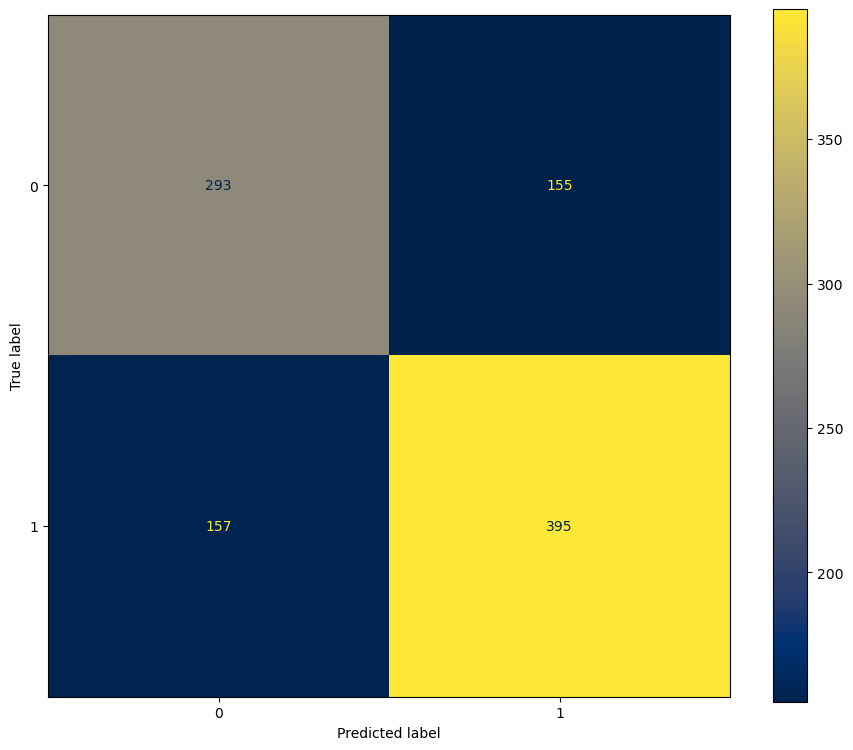

In [100]:
fig, ax = plt.subplots(figsize=(11, 9))
ConfusionMatrixDisplay.from_estimator(estimator=rf_sentiment,X=vectorizer.transform(X_test).toarray(),y=y_test, cmap='cividis', ax=ax)

### Model Seven : Weighted Random Forest

In [103]:
# Calculate class weight
class_weight = compute_class_weight(class_weight= 'balanced', classes= np.unique(df_feature_critics.review_type), 
                      y = df_feature_critics.review_type.values)

class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 1.058425063505504, 1: 0.9476876421531463}

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       448
           1       0.74      0.67      0.70       552

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



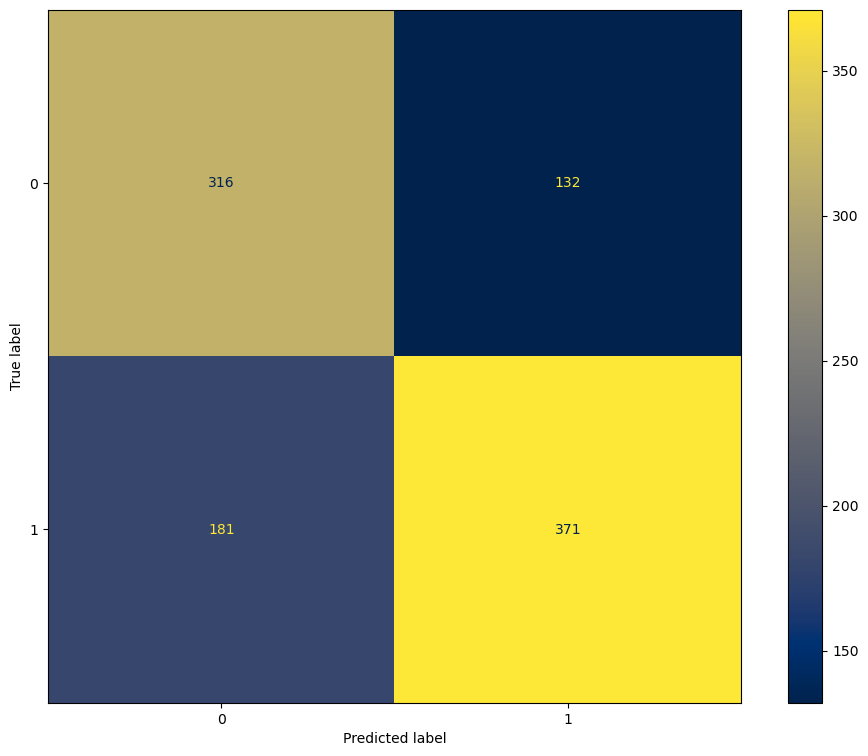

In [109]:
# Instantiate vectorizer class
vectorizer = CountVectorizer(min_df=1)

# Transform our text data into vector
X_train_vec = vectorizer.fit_transform(X_train).toarray()

# Initialize random forest and train it
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)
rf_weighted.fit(X_train_vec, y_train)

# Predict and output classification report
y_predicted = rf_weighted.predict(vectorizer.transform(X_test).toarray())

print(classification_report(y_test, y_predicted))

fig, ax = plt.subplots(figsize=(12, 9))
ConfusionMatrixDisplay.from_estimator(estimator=rf_weighted,X=vectorizer.transform(X_test).toarray(),y=y_test, cmap='cividis', ax=ax)


## PREDICTION MODEL IS READY !  (MOVIE STATUS PREDICTION)

In [112]:
# Define a function to predict movie status based on the overall sentiment
def predict_movie_status(prediction):
    """Assign label (Fresh/Rotten) based on prediction"""
    positive_percentage = (prediction == 1).sum()/len(prediction)*100
    
    prediction = 'Fresh' if positive_percentage >= 60 else 'Rotten'
    
    print(f'Positive review:{positive_percentage:.2f}%')
    print(f'Movie status: {prediction}')

###  'Body of Lies' Prediction

In [115]:
# Gather all of the reviews of Body of Lies movie
df_bol = df_merged.loc[df_merged['movie_title'] == 'Body of Lies']
df_bol.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
7382,m/10009225-body_of_lies,Body of Lies,DiCaprio (not Crowe) is in top form in Scott's...,Fresh,Rotten
7383,m/10009225-body_of_lies,Body of Lies,Neither the location-based verisimilitude of R...,Rotten,Rotten
7384,m/10009225-body_of_lies,Body of Lies,"DiCaprio gives the role plenty of brio, while ...",Fresh,Rotten
7385,m/10009225-body_of_lies,Body of Lies,"Convincing and gripping, Body of Lies is at th...",Fresh,Rotten
7386,m/10009225-body_of_lies,Body of Lies,Lies and consequences form the heart of this b...,Fresh,Rotten


In [117]:
# Get the prediction
y_predicted_bol = rf_weighted.predict(vectorizer.transform(df_bol['review_content']).toarray())
predict_movie_status(y_predicted_bol)

Positive review:51.96%
Movie status: Rotten


In [121]:
# Get the true label
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'Body of Lies'].unique()

array(['Rotten'], dtype=object)

### 'Angel Heart' Prediction

In [125]:
# Gather all of the reviews of Angel Heart movie
df_ah = df_merged.loc[df_merged['movie_title'] == 'Angel Heart']
df_ah.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
9240,m/1000959-angel_heart,Angel Heart,"Angel Heart is a thriller and a horror movie, ...",Fresh,Fresh
9245,m/1000959-angel_heart,Angel Heart,Alan Parker's pulp sensibilities are beautiful...,Fresh,Fresh
9246,m/1000959-angel_heart,Angel Heart,One of the few truly great modern horror films,Fresh,Fresh
9248,m/1000959-angel_heart,Angel Heart,"Erotic, twisty and incredibly disturbed. Splen...",Fresh,Fresh
9249,m/1000959-angel_heart,Angel Heart,Este excepcional noir conta com maravilhosa fo...,Fresh,Fresh


In [127]:
# Get the prediction
y_predicted_ah = rf_weighted.predict(vectorizer.transform(df_ah['review_content']).toarray())
predict_movie_status(y_predicted_ah)

Positive review:66.67%
Movie status: Fresh


In [129]:
# Get the true label
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'Angel Heart'].unique()

array(['Fresh'], dtype=object)

### 'The Duchess' Prediction

In [132]:
# Gather all of the reviews of The Duchess movie 
df_duchess = df_merged.loc[df_merged['movie_title'] == 'The Duchess']
df_duchess.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
8558,m/10009493-duchess,The Duchess,For all its luscious period trappings and Keir...,Rotten,Fresh
8559,m/10009493-duchess,The Duchess,Solid but distant melodrama about the flamboya...,Fresh,Fresh
8560,m/10009493-duchess,The Duchess,"It could have been an intriguing, poignant sag...",Rotten,Fresh
8561,m/10009493-duchess,The Duchess,Has riveting parallels with much more recent B...,Fresh,Fresh
8562,m/10009493-duchess,The Duchess,Ralph Fiennes steals it as the dour duke in a ...,Fresh,Fresh


In [134]:
# Get the prediction
y_predicted_duchess = rf_weighted.predict(vectorizer.transform(df_duchess['review_content']).toarray())
predict_movie_status(y_predicted_duchess)

Positive review:60.74%
Movie status: Fresh


In [136]:
# Get the true label
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'The Duchess'].unique()

array(['Fresh'], dtype=object)

## THANK YOU !